In [ ]:
from google.colab import files
import pandas as pd

# Upload a file from your local PC to Colab
uploaded = files.upload()

# Assuming you've uploaded a CSV file, you can read it into a DataFrame
import io
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('latin-1')))  # Specify the encoding as 'latin-1'

# Now you can work with the DataFrame 'df'
print(df.head())



Saving spam.csv to spam.csv
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# pre process the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### here the data is mainly of 2 types spam and ham ( not a spam)

In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Lets remove the null values from this . using the drop na .

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

## lets convert ham into 1 and spam as 0 .

In [ ]:
df['spam'] = df['v1'].apply(lambda x : 1 if x== 'spam' else 0)
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train ,y_test,y_train = train_test_split(df.v2,df.spam,test_size= 0.25)

### Here the machine model will nor process the text . so we need to comvert that into the  0,1 for that we use :
**count vectorised techneque**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_new = cv.fit_transform(x_train,y_train)
x_new.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# lets find the best model for this project  : using grid searchcv method

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the models and their parameter grids
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20]
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'naive_bayes': {
        'model': MultinomialNB(),
        'params': {}
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }
}

best_model = None
best_accuracy = 0

# Loop through the models and perform GridSearchCV
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(x_new, y_train)
    y_pred = clf.predict(cv.transform(x_test))
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")


Best Model: naive_bayes
Best Accuracy: 0.9784637473079684


# hence we choose the naive_bayes .

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_new,y_train)

MultinomialNB()

In [ ]:
emails = [
    'heymohan can we get together?',
    'upto 20% dicount on parking . exclusive offer '
]
email_count = cv.transform(emails)
model.predict(email_count)


array([0, 0])

In [ ]:
c= cv.transform(x_test)
model.predict(c)


array([0, 1, 0, ..., 0, 0, 0])

# HERE CONVERTING INTO MATRIX GIVING SOME INCONENINT . SO LETS PERFORM SOME PIPPING OPERATION

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(x_test,y_test)

0.9784637473079684

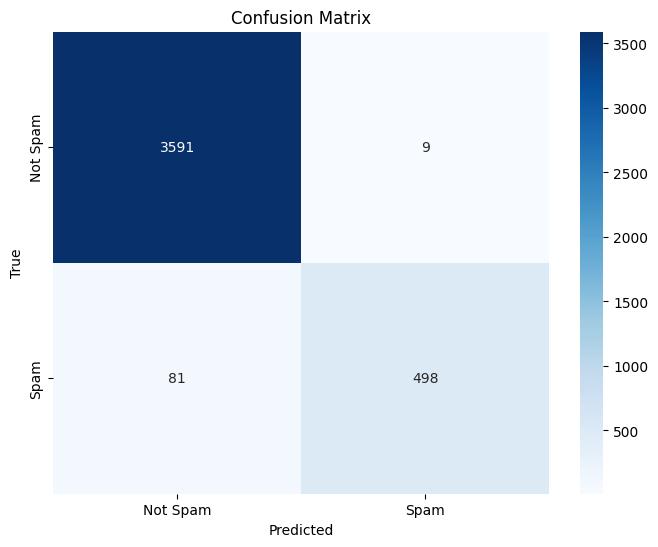

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


model.fit(x_new, y_train)

y_pred = model.predict(c)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# thankyou